In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
class CelebDFV2Dataset(Dataset):

    def __init__(self, data_root, df: DataFrame, mode, transform, ):
        self.data_root = data_root
        self.df = df
        self.mode = mode
        self.transform = transform

    def __getitem__(self, index):
        video, img_file, label, ori_video, frame = self.df.iloc[index].values
        img_path = os.path.join(self.data_root, 'crops', video, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = self.transform(image)
        return image, label

    def __len__(self):
        r = self.df.shape[0]
        return r

In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [4]:
df = pd.read_csv('../folds.csv')
df.shape

(238267, 5)

In [5]:
x_train, x_val = train_test_split(df, test_size=0.1)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_data = CelebDFV2Dataset(data_root='F:\\Celeb-DF-v2', df=x_train, mode='train', transform=transform)
train_loader = DataLoader(train_data, num_workers=0, batch_size=16, shuffle=True, drop_last=True, pin_memory=True)

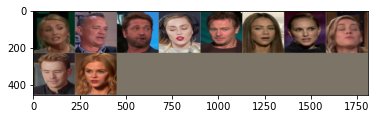

In [6]:
# Get a batch of training data
inputs, classes = next(iter(train_loader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out)